<a href="https://colab.research.google.com/github/AurelienGgt/Customer-Personality-Analysis/blob/main/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import of data + library + Dependance (if needed)

## Access to google drive

In [1]:
# Mount access to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import library

In [2]:
# Library
import pandas as pd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for random error
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Access of the data

In [3]:
df = pd.read_csv('/content/drive/My Drive/Customer Personality Analysis/marketing_campaign.csv',sep='\t') # We have a separator here

## Visualisation of the dataframe

In [4]:
# Used Ia for the explaination of my code
def visualize_dataframe(df: pd.DataFrame, num_rows: int = 5):
    """
    Display key information about a Pandas DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to be analyzed.

    num_rows : int, optional (default=5) # head is by default 5
        Number of rows to display from the DataFrame's head.

    Displays
    --------
    - Shape (number of rows and columns)
    - First few rows (head)
    - Summary statistics (describe)
    - Data types of each column
    """

    separator = "-" * 100

    print(separator)
    print(f"{' ' * 40}\033[1mShape:\033[0m")
    print(separator, "\n")
    print(f"The DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

    print(separator)
    print(f"{' ' * 40}\033[1mHead ({num_rows} rows):\033[0m")
    print(separator)
    display(df.head(num_rows))

    print(separator)
    print(f"{' ' * 40}\033[1mSummary Statistics:\033[0m")
    print(separator)
    display(df.describe().T)

    print(separator)
    print(f"{' ' * 40}\033[1mData Types:\033[0m")
    print(separator)
    display(df.dtypes)

    return None

In [5]:
visualize_dataframe(df)

----------------------------------------------------------------------------------------------------
                                        Shape:
---------------------------------------------------------------------------------------------------- 

The DataFrame contains 2240 rows and 29 columns.

----------------------------------------------------------------------------------------------------
                                        Head (5 rows):
----------------------------------------------------------------------------------------------------


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


----------------------------------------------------------------------------------------------------
                                        Summary Statistics:
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


----------------------------------------------------------------------------------------------------
                                        Data Types:
----------------------------------------------------------------------------------------------------


,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


### Visualisation of the missing value

In [6]:
# Used Ia for the explaination of my code, and I modified a function I made during my studies from 3 def to one class

class DataInspector:
    """
    A class to analyze missing values and unique values in a Pandas DataFrame.
    """

    def __init__(self, df: pd.DataFrame, verbose: bool = True):
        """
        Initialize the DataInspector with a DataFrame.

        Parameters:
        ----------
        df : pd.DataFrame
            The DataFrame to inspect.
        verbose : bool, optional (default=True)
            Whether to print details when calling methods.
        """
        self.df = df
        self.verbose = verbose

    @property
    def missing_percentage(self) -> float:
        """
        Compute the percentage of missing values across the entire DataFrame.

        Returns:
        -------
        float
            The percentage of missing values in the DataFrame.
        """
        total_cells = self.df.shape[0] * self.df.shape[1]
        missing_count = self.df.isna().sum().sum()
        return round((missing_count / total_cells) * 100, 2)

    def missing_values_summary(self):
        """
        Display a summary of missing values per column, including percentages.
        """
        print("-" * 100)
        print(" " * 40, "\033[1mMissing Values Summary:\033[0m")
        print("-" * 100)

        missing_stats = pd.DataFrame({
            "Percentage": (self.df.isnull().sum() / self.df.shape[0] * 100).round(2),
            "Missing Values": self.df.isnull().sum()
        }).sort_values(by="Missing Values", ascending=False)

        display(missing_stats)

        print("-" * 100)
        print(f"Overall missing data: \033[1m{self.missing_percentage}%\033[0m")

    def unique_values_summary(self):
        """
        Display a summary of unique values per column.
        """
        print("-" * 100)
        print(" " * 40, "\033[1mUnique Values Summary:\033[0m")
        print("-" * 100)

        unique_stats = pd.DataFrame({
            "Unique Percentage": (self.df.nunique() / self.df.shape[0] * 100).round(2),
            "Unique Values": self.df.nunique()
        }).sort_values(by="Unique Values", ascending=False)

        display(unique_stats)

# How to use :

# DataInspector(dataframe).missing_values_summary() -> for missing values
# DataInspector(dataframe).unique_values_summary() -> for unique values

DataInspector(dataframe).unique_values_summary() is useless for our analyse but I keep it just in case I can need it later

In [7]:
DataInspector(df).missing_values_summary()

----------------------------------------------------------------------------------------------------
                                         Missing Values Summary:
----------------------------------------------------------------------------------------------------


,Percentage,Missing Values
Income,1.07,24
ID,0.00,0
NumDealsPurchases,0.00,0
Z_Revenue,0.00,0
Z_CostContact,0.00,0
Complain,0.00,0
AcceptedCmp2,0.00,0
AcceptedCmp1,0.00,0
AcceptedCmp5,0.00,0
AcceptedCmp4,0.00,0


----------------------------------------------------------------------------------------------------
Overall missing data: 0.04%


The income is an important feature for us, the question is do we have to delete the missing income or add a median here ? In my opinion for 0.03% missing value, it's better to dropna()

In [8]:
df = df.dropna() # removed the missing value here

### Modify the date

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') # Changed the format to date

<ipython-input-9-2c5d654928cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') # Changed the format to date


# Visualisation of the dataframe :

In [10]:
df # Visualisation of the dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Before we start our analyse I will rename some colums like the products.

In [11]:
# Rename columns
df = df.rename(columns={
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
})

First let's check some categorical columns

Because we will check multiple column, it's better to create a function instead of writing the same code all the time.

This function will help us to visualise the categorical column we want to focus

In [12]:
def categorical_visualisation(col) :

  """
  This function will help us to visualise the categorical column we want to focus
  We put the visualisation as countplot but a pie was also possible.

  Args:
      col: The name of the column to visualize.
  """

# On this part we are watching directly the value
  print(f"Visualisation of the Value for {col}: ")
  print("")
  column = df[col].value_counts()
  print(column)

# We are using print('') to make some space
  print('')
  print('')

# On this part we are watching directly the visualisation
  print(f"Graphic of the visualisation for {col}: ")
  print("")
  sorted_cat= df[col].value_counts().index
  ax = sns.countplot(x=col, data=df, hue=col, palette="magma", dodge=False, legend=False,order=sorted_cat) # color preference here

  # We add the count of the top of the column :
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')


  # Add axis labels
  plt.xticks(rotation=45) # Rotation of the label for a better visualisation
  plt.xlabel(col) # Label for x
  plt.title(f"Visualisation of the column : {col}")
  plt.ylabel("Amount of people") # Label for y
  plt.grid(True) # Preference to see the grid
  plt.show()

In [13]:
def visualisation_groupby(df):

    """
    Visualise grouped data using subplots in Seaborn (removed the Plotly because was not useful for Github).

    Args:
        df (pd.DataFrame): A DataFrame with groupby data.
    """
    products = ['Fish', 'Wines', 'Fruits', 'Meat', 'Sweets', 'Gold']

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()  # Permet d'accéder aux axes sous forme de liste

    for i, product in enumerate(products):
        if product in df.columns:
            sns.barplot(x=df.index, y=df[product], ax=axes[i])
            max_height = max(df[product]) * 1.1  # Ajuster la hauteur du graphique
            axes[i].set_ylim(0, max_height)
            for p in axes[i].patches:
                axes[i].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + max_height * 0.02),
                                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
            axes[i].set_title(f"{product} Purchases")
            axes[i].set_xticklabels(df.index, rotation=45)

    plt.tight_layout()
    plt.show()

## Column : Education

Visualisation of the Value for Education: 

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


Graphic of the visualisation for Education: 



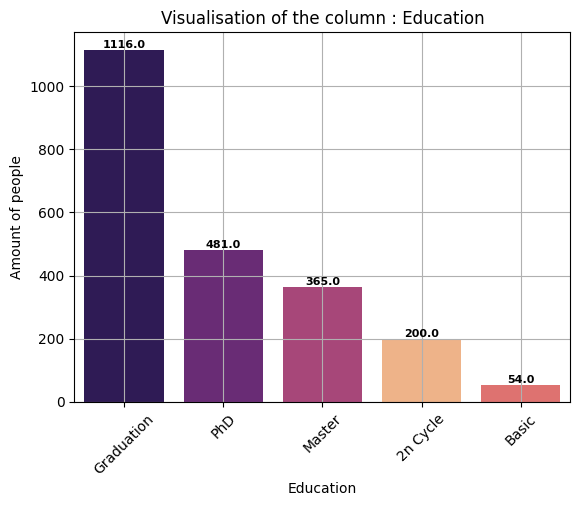

In [14]:
categorical_visualisation("Education")

As we can see, most of people are graduate with a diploma, a lot of them are not specified maybe Bachelor, Master or Phd but not specified.

Let's categorie them in 3 parts : No degree, graduate and post graduate

In [15]:
df["Education"]=df["Education"].replace({"Basic":"No Degree","2n Cycle":"No Degree", "Graduation":"Graduate", "Master":"Post graduate", "PhD":"Post graduate"})

In [16]:
# We will calculate the amount of people without university degree :

print(f"The percentage of people who is not graduate : {round((df['Education'].value_counts()['No Degree']/len(df))*100,2)} %")
print(f"The percentage of people who is graduate but don't have university degree : {round((df['Education'].value_counts()['Graduate']/len(df))*100,2)} %")
print(f"The percentage of people who is graduate with university degree : {round((df['Education'].value_counts()['Post graduate']/len(df))*100,2)} %")

The percentage of people who is not graduate : 11.46 %
The percentage of people who is graduate but don't have university degree : 50.36 %
The percentage of people who is graduate with university degree : 38.18 %


Visualisation of the Value for Education: 

Education
Graduate         1116
Post graduate     846
No Degree         254
Name: count, dtype: int64


Graphic of the visualisation for Education: 



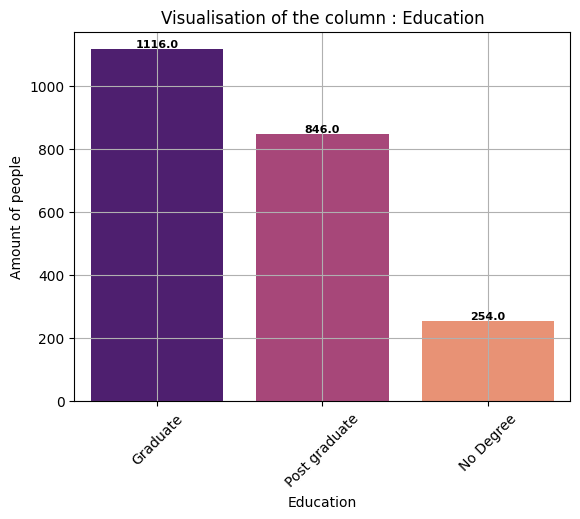

In [17]:
categorical_visualisation("Education")

In [18]:
# Easier for the visualisation
education_df = df.groupby(['Education']).sum(numeric_only=True)# added numeric_only=True because error with date?
education_df = education_df[['Fish','Wines','Fruits','Meat','Sweets','Gold']]
education_df

,Fish,Wines,Fruits,Meat,Sweets,Gold
Education,,,,,,
Graduate,48453,318111,34441,201319,34915,56563
No Degree,10529,40560,6472,27634,7599,10609
Post graduate,24423,317412,17492,141110,17382,30255


<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

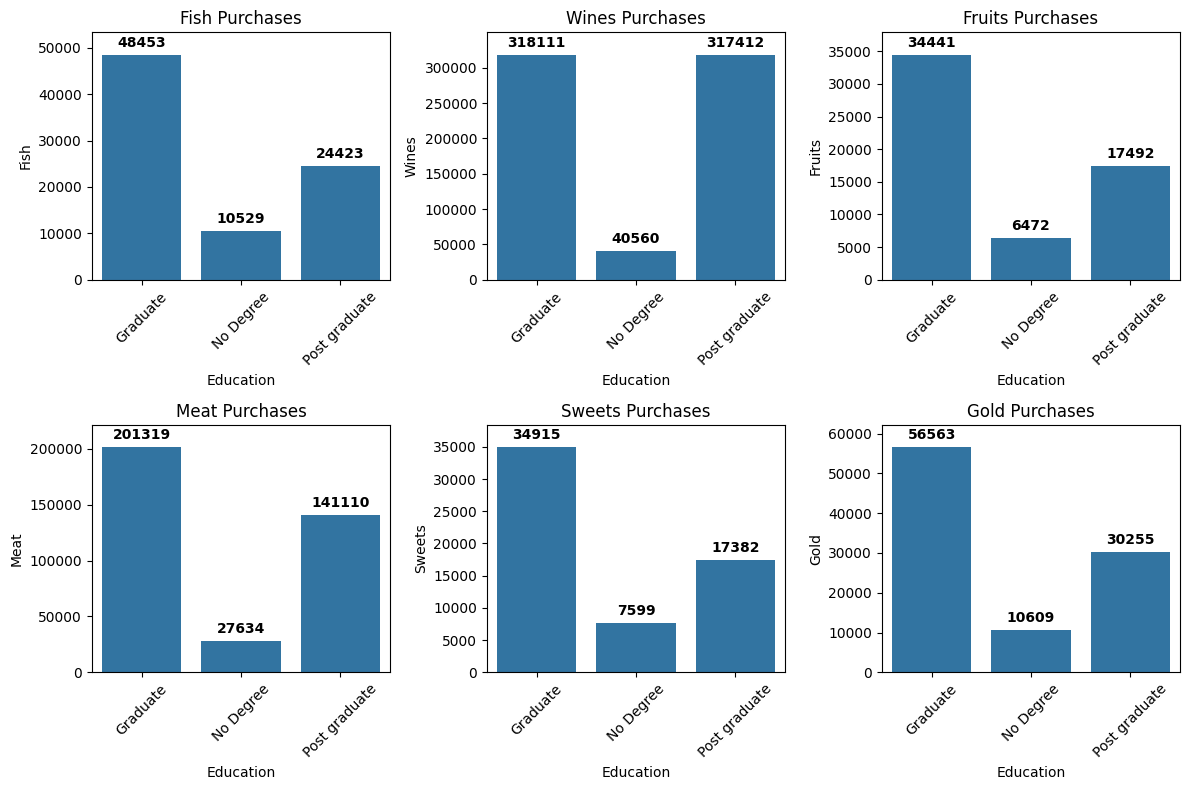

In [19]:
visualisation_groupby(education_df)

## Column : Marital status

Visualisation of the Value for Marital_Status: 

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Graphic of the visualisation for Marital_Status: 



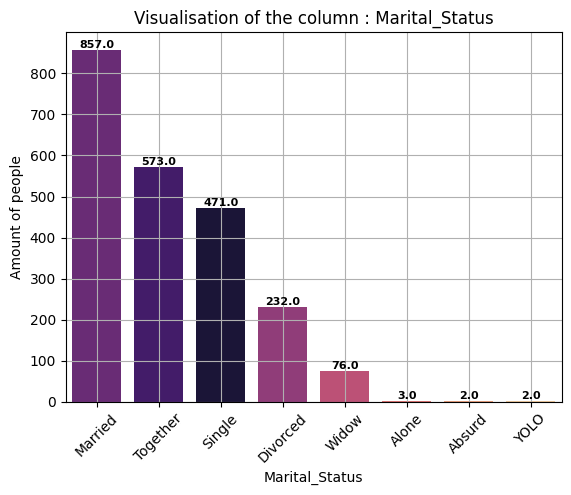

In [20]:
categorical_visualisation("Marital_Status")

Let's check too the type of product they mainly want to buy by Marital_Status.
As we did for education, we will do the same here in 2 categories : Single, in relationship

In [21]:
df['Marital_Status']=df['Marital_Status'].replace({"Absurd":"Single",
                                                   "Alone":"Single",
                                                   "Divorced":"Single",
                                                   "Married":"In relationship",
                                                   "Single":"Single",
                                                   "Together":"In relationship",
                                                   "Widow":"Single",
                                                   "YOLO":"Single"
                                                   })

In [22]:
# We will calculate the amount of people in relationship and single in our analyse :

print(f"The percentage of people in relationship is : {round((df['Marital_Status'].value_counts()['In relationship']/len(df))*100,2)} %")
print(f"The percentage of people single is : {round((df['Marital_Status'].value_counts()['Single']/len(df))*100,2)} %")

The percentage of people in relationship is : 64.53 %
The percentage of people single is : 35.47 %


Visualisation of the Value for Marital_Status: 

Marital_Status
In relationship    1430
Single              786
Name: count, dtype: int64


Graphic of the visualisation for Marital_Status: 



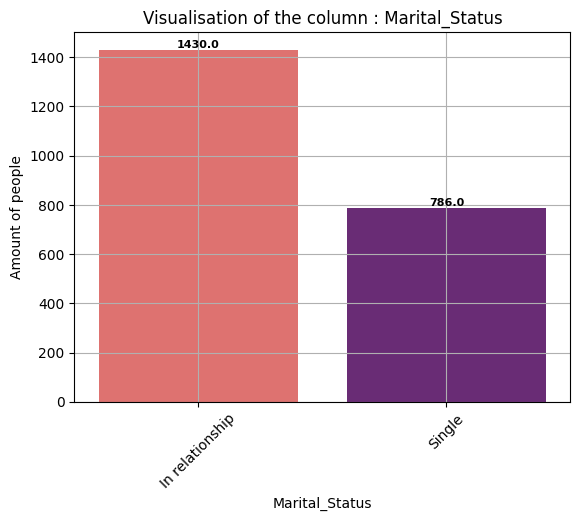

In [23]:
categorical_visualisation("Marital_Status")

In [24]:
# Easier for the visualisation
marital_df = df.groupby(['Marital_Status']).sum(numeric_only=True)
marital_df = marital_df[['Fish','Wines','Fruits','Meat','Sweets','Gold']]
marital_df

,Fish,Wines,Fruits,Meat,Sweets,Gold
Marital_Status,,,,,,
In relationship,52778,433691,36593,233262,37957,61473
Single,30627,242392,21812,136801,21939,35954


<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-13-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

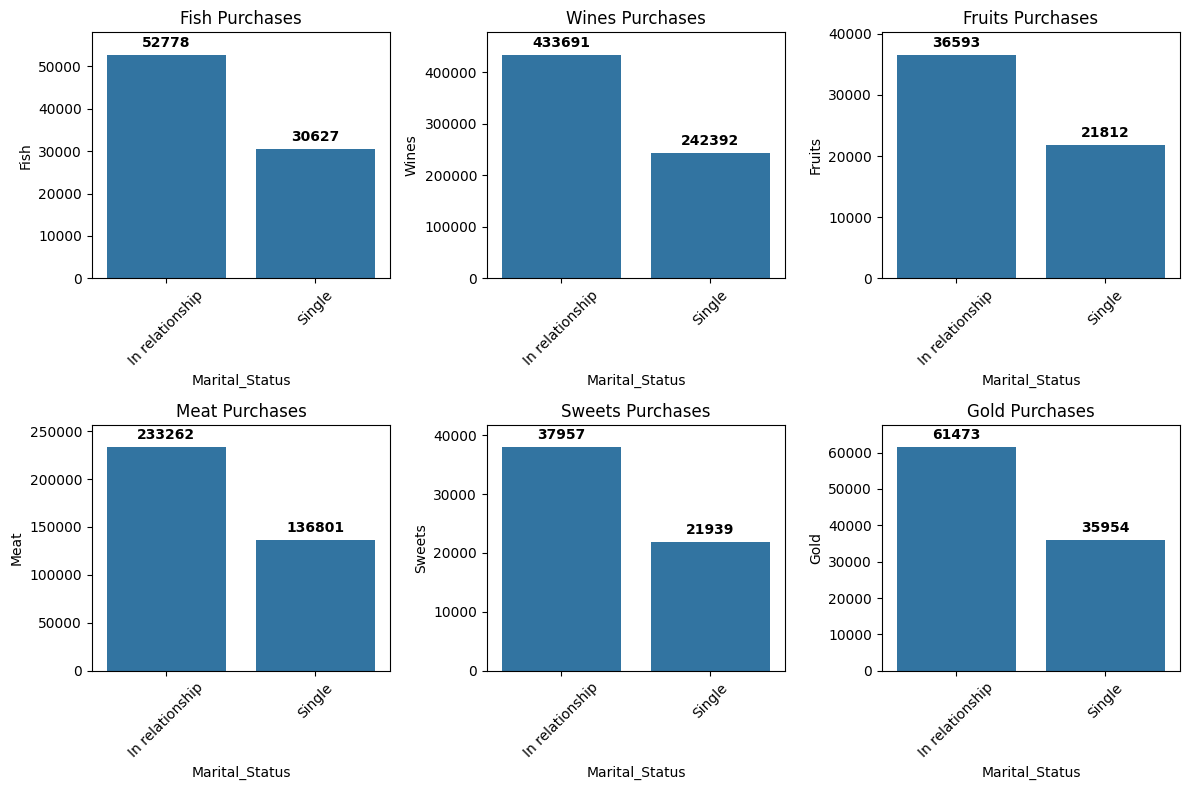

In [25]:
visualisation_groupby(marital_df)

## Column : Complain

As we can see most of our customer are in relationship

Visualisation of the Value for Complain: 

Complain
0    2195
1      21
Name: count, dtype: int64


Graphic of the visualisation for Complain: 



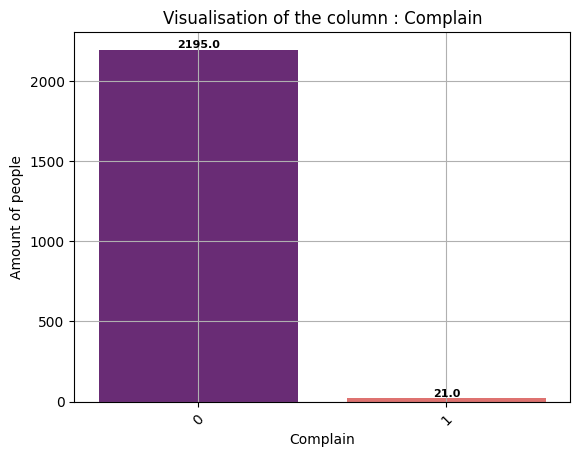

In [26]:
categorical_visualisation("Complain")

In [27]:
# We will calculate the amount of people unhappy in our analyse :

unhappy_user =  (df[df['Complain'] == 1].value_counts())
print(f"The percentage of people unhappy is : {round(((len(unhappy_user) / len(df))*100),2)} %")

The percentage of people unhappy is : 0.95 %


As we can see less than 1% of people are unhappy, it will be good to investigate why they are unhappy, and if we can find a reason why.

In [28]:
unhappy_user

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,
255,1951,Graduate,Single,22263.0,1,1,2014-03-30,31,17,0,2,0,0,2,2,1,0,3,6,0,0,0,0,0,1,3,11,0,1
7192,1955,Graduate,In relationship,65748.0,0,1,2013-04-15,58,172,73,93,95,78,34,2,2,4,10,1,0,0,0,0,0,1,3,11,0,1
10971,1977,Graduate,Single,37774.0,2,0,2012-09-03,28,173,8,107,7,2,176,4,7,2,3,9,1,0,0,0,0,1,3,11,1,1
10637,1964,Graduate,In relationship,40800.0,1,2,2013-01-01,77,24,0,27,8,30,10,2,3,0,3,7,0,0,0,0,0,1,3,11,0,1
10401,1976,No Degree,In relationship,26326.0,0,0,2013-09-04,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,3,11,0,1
9916,1954,Graduate,In relationship,38998.0,1,1,2012-11-03,92,34,1,14,0,0,5,3,2,0,3,8,0,0,0,0,0,1,3,11,0,1
9500,1959,Graduate,In relationship,58113.0,0,1,2013-01-25,66,221,104,169,102,78,84,3,9,2,8,7,0,0,0,0,0,1,3,11,0,1
9483,1959,Graduate,In relationship,57957.0,0,1,2013-08-19,24,290,59,177,77,5,29,7,4,6,8,3,0,0,0,0,0,1,3,11,0,1
7966,1959,Graduate,Single,80982.0,1,1,2013-01-08,48,505,137,401,104,22,22,3,11,5,11,5,0,0,0,0,0,1,3,11,0,1


# Feature Engineering

In this section, we will create some column to help us for our analyse.

## The user is parent?

In [29]:
# We are Creating a column 'IsParent' based on Kidhome and Teenhome :
## Possibility to use np.where here too
df['IsParent'] = df.apply(lambda row: 1 if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 0, axis=1)

In [30]:
isparent_user =  (df[df['IsParent'] == 1].value_counts())
print(f"The percentage of people who are parent is : {round(((len(isparent_user) / len(df))*100),2)} %")

The percentage of people who are parent is : 71.44 %


Visualisation of the Value for IsParent: 

IsParent
1    1583
0     633
Name: count, dtype: int64


Graphic of the visualisation for IsParent: 



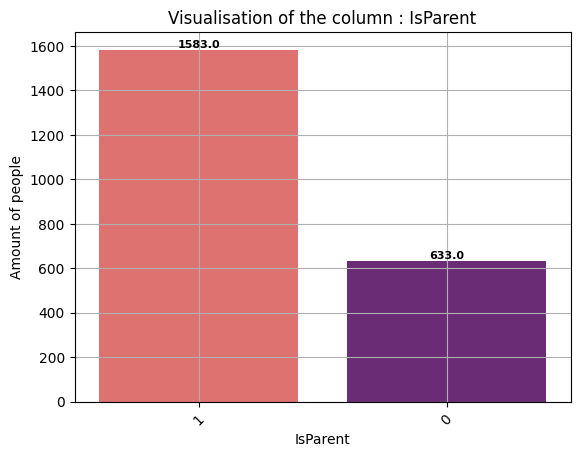

In [31]:
categorical_visualisation('IsParent')

## Age of the User

The dataset was made in 2021, so I will consider the date max is 2021.

In [32]:
df['Age_of_user'] = 2021 - df['Year_Birth']

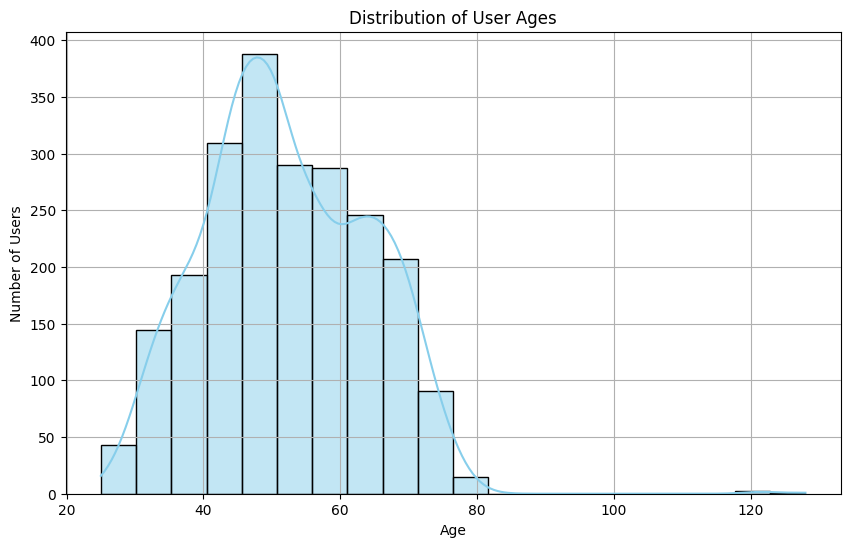

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_of_user'], kde=True, bins=20, color='skyblue')  # Use histplot for age distribution (better for me)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [34]:
print(f"The average age of the user is : {round(df['Age_of_user'].mean(),2)} years")
print(f"The younger user is : {round(df['Age_of_user'].min(),2)} years")
print(f"The older user is : {round(df['Age_of_user'].max(),2)} years")

The average age of the user is : 52.18 years
The younger user is : 25 years
The older user is : 128 years


Something is off here, The older one is 128 years, which is impossible..

## Number of Kids

In [35]:
df['Number of Kids'] = df['Kidhome'] + df['Teenhome']

Visualisation of the Value for Number of Kids: 

Number of Kids
1    1117
0     633
2     416
3      50
Name: count, dtype: int64


Graphic of the visualisation for Number of Kids: 



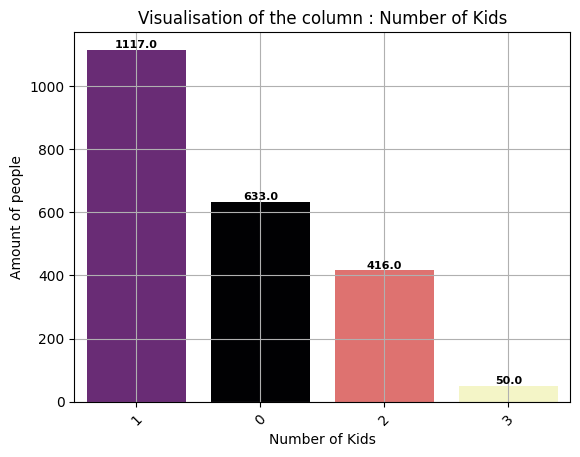

In [36]:
categorical_visualisation('Number of Kids')

As we can see, a lot of people don't have or have only 1 child. With this column for the kidd, we can removed the previous column

In [37]:
# Create a loop to avoid to write 4 times the same sentences
for kids in range(4):  # From 0 à 3 kids
    percentage = round((df["Number of Kids"] == kids).mean() * 100, 2)
    print(f"The percentage of people with {kids} kid(s) is: {percentage}%")

The percentage of people with 0 kid(s) is: 28.56%
The percentage of people with 1 kid(s) is: 50.41%
The percentage of people with 2 kid(s) is: 18.77%
The percentage of people with 3 kid(s) is: 2.26%


In [38]:
to_drop = ['Kidhome','Teenhome']
df = df.drop(to_drop, axis=1)

## Create a column for Acceptation web campaign



The way to create with type of column will be usefull later if we want to make a RFM

In [39]:
df['total_purchase'] = df['AcceptedCmp1']+ df['AcceptedCmp2'] + df['AcceptedCmp3']+ df['AcceptedCmp4']+ df['AcceptedCmp5']

Visualisation of the Value for total_purchase: 

total_purchase
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64


Graphic of the visualisation for total_purchase: 



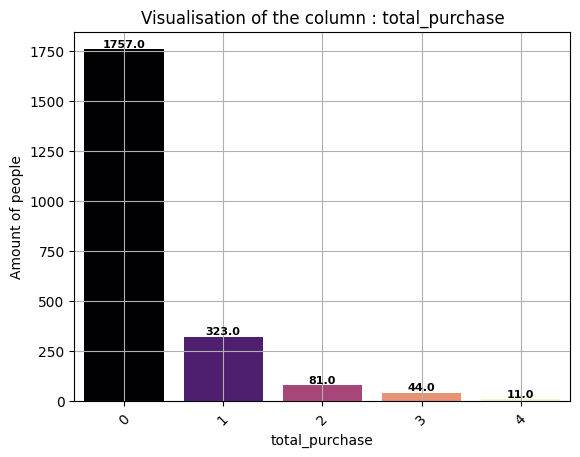

In [40]:
categorical_visualisation('total_purchase')

In [41]:
# Create a loop to avoid to write 5 times the same sentences
for marketing_campaign in range(5):  # From 0 à 4 campaign
    percentage = round((df['total_purchase'] == marketing_campaign).mean() * 100, 2)
    print(f"The percentage who accept with the {marketing_campaign} campaign(s) is: {percentage}%")

The percentage who accept with the 0 campaign(s) is: 79.29%
The percentage who accept with the 1 campaign(s) is: 14.58%
The percentage who accept with the 2 campaign(s) is: 3.66%
The percentage who accept with the 3 campaign(s) is: 1.99%
The percentage who accept with the 4 campaign(s) is: 0.5%


In [42]:
to_drop = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df = df.drop(to_drop, axis=1)

Now we have a better view, we can remove this column too

## Expense

In [50]:
# Will be easier later for the algorith to reduce our dimension
df['Expenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

We will see a visualisation of our expense too here

<ipython-input-59-9d6f1e3dce48>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="Blues_r")


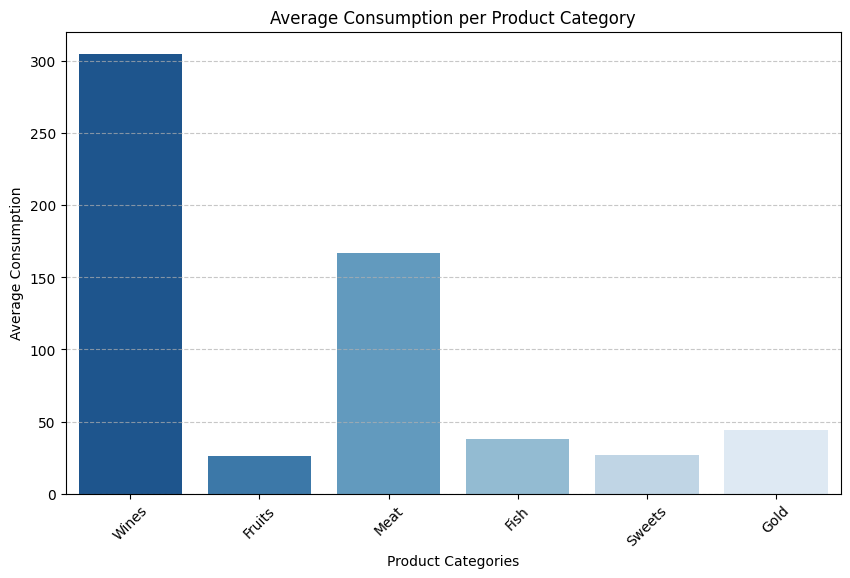

In [59]:
# Liste des catégories de produits
categories = ["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"]

# Création d'une colonne "Expenses" représentant la somme des dépenses par individu
df["Expenses"] = df[categories].sum(axis=1)

# Moyenne des valeurs par catégorie (consommation moyenne par type de produit)
mean_values = df[categories].mean()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_values.index, y=mean_values.values, palette="Blues_r")

# Ajout des labels et du titre
plt.xlabel("Product Categories")
plt.ylabel("Average Consumption")
plt.title("Average Consumption per Product Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Affichage du graphique
plt.show()

## Removing last column with the same data

In [43]:
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Dt_Customer',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'IsParent',
 'Age_of_user',
 'Number of Kids',
 'total_purchase']

For our Analyse we will remove some column here because we will not use them for example Year_birth is similar to Age_of_user.

In [44]:
# Remove some columns, I will update this list step by step
to_drop = ["Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [45]:
df

,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,IsParent,Age_of_user,Number of Kids,total_purchase
0,Graduate,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,4,7,0,3,11,1,0,64,0,0
1,Graduate,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,2,5,0,3,11,0,1,67,2,0
2,Graduate,In relationship,71613.0,2013-08-21,26,426,49,127,111,21,...,10,4,0,3,11,0,0,56,0,0
3,Graduate,In relationship,26646.0,2014-02-10,26,11,4,20,10,3,...,4,6,0,3,11,0,1,37,1,0
4,Post graduate,In relationship,58293.0,2014-01-19,94,173,43,118,46,27,...,6,5,0,3,11,0,1,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,In relationship,61223.0,2013-06-13,46,709,43,182,42,118,...,4,5,0,3,11,0,1,54,1,0
2236,Post graduate,In relationship,64014.0,2014-06-10,56,406,0,30,0,0,...,5,7,0,3,11,0,1,75,3,1
2237,Graduate,Single,56981.0,2014-01-25,91,908,48,217,32,12,...,13,6,0,3,11,0,0,40,0,1
2238,Post graduate,In relationship,69245.0,2014-01-24,8,428,30,214,80,30,...,10,3,0,3,11,0,1,65,1,0
